In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

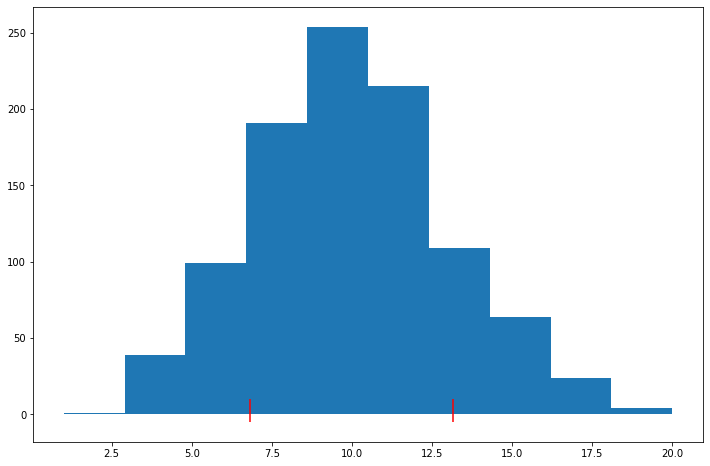

In [4]:
# plot sample histogram along with [mean - std, mean + std] region
def plot_hist(sample, figsize=(12, 8), bins=10):
    mean, std = np.mean(sample), np.std(sample)
    plt.figure(figsize=figsize)
    plt.hist(sample, bins=bins)
    plt.vlines([mean - std, mean + std], -5, 10, colors='red')
    plt.show()
    
    
lam = 10
N = 1000
x = np.random.poisson(lam, N)
plot_hist(x, bins=10)

# The mean is 10, and the standard deviation is the square root of 10. The majority of observations seem to be
# contained in standard deviation neighbourhood of the mean, but not in a much smaller neighbourhood
# - so, yes mean and standard deviation are a good description of the sample.

# This is due to the fact that Poisson distribution is a unimodal one

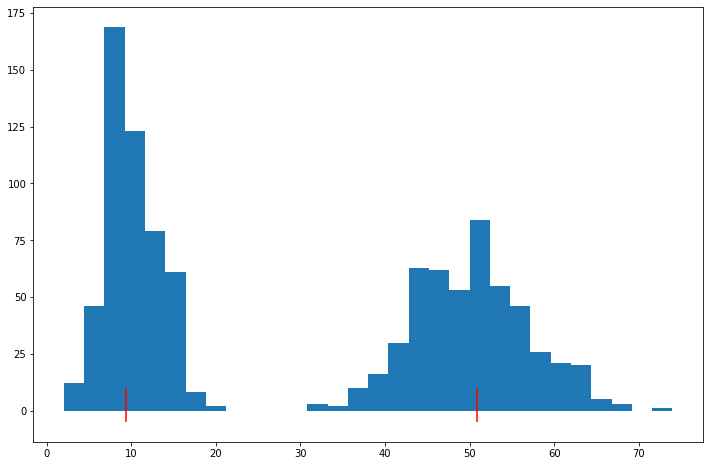

In [5]:
lam = 10
N = 1000
x1 = np.random.poisson(lam, N // 2)
x2 = np.random.poisson(lam * 5, N // 2)
x_bimodal = np.concatenate((x1, x2))
plot_hist(x_bimodal, bins=30)

# Below an example of bimodal distribution where the mean and standard deviation
# do not provide a good descirption of the data sample

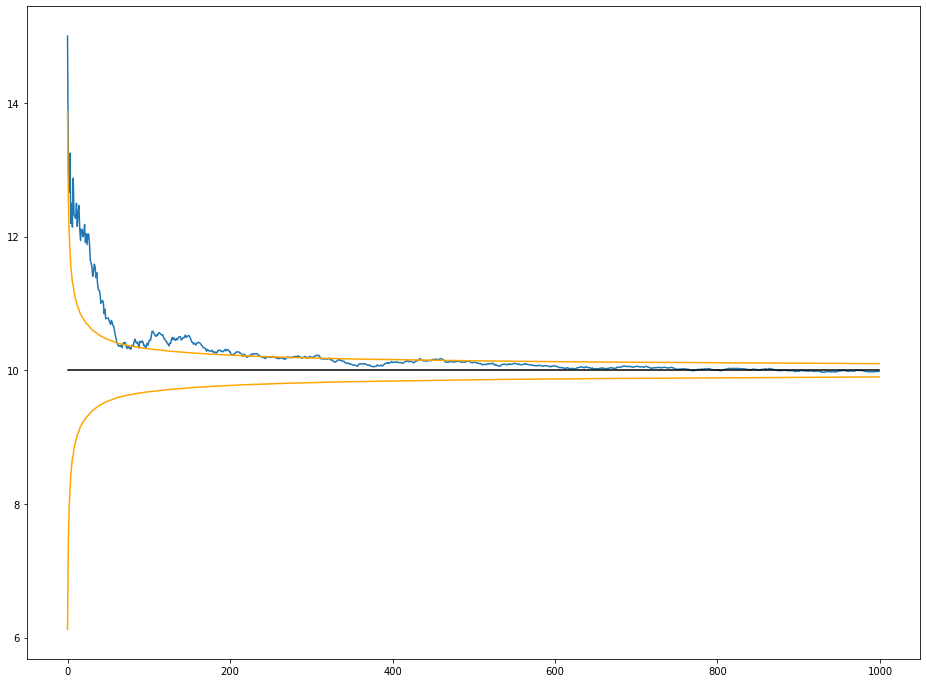

In [6]:
means = np.cumsum(x).astype(np.float32) / np.arange(1, N + 1)
Ex = np.repeat(lam, N)

plt.figure(figsize=(16, 12))
plt.plot(means)
plt.plot(Ex, c='black')

sd = np.sqrt(means / np.arange(1, N + 1))
low = Ex - sd
high = Ex + sd

plt.plot(low, c='orange')
plt.plot(high, c='orange')
plt.show()

# The standard deviation lines seem to be as far away from the mean as the typical deviations, more or less.
# Below plot is a good illustration of the Law of large numbers:
# - weak version tells us that for a given epsilon, sample mean of large enough size N
#   is likely to fall in the interval [mean - epsilon, mean + epsilon], although the opposite
#   can still happen infinitely many times for n >= N
# - strong law tells us that the above will almost surely hold for all n >= N

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?
   
   
Answering the points:
 * We have identity $\frac{1}{k(k+1)} = \frac{1}{k} - \frac{1}{k+1}$, therefore we can write:
 $\sum_{k \in Z}P(X=k) = P(X=0) + 2\sum_{k \in Z_+}P(X=k) = \frac{1}{2} + \frac{1}{2}(\frac{1}{1} - \frac{1}{2} + \frac{1}{2} - \frac{1}{3} + \ldots) = 1. \newline$
 So, indeed these formulas describe a discrete distribution.
 * $X$ does not have a mean since $\sum_{k \in Z_{+}}^{\infty} \frac{1}{4k(k+1)} * k = \sum_{k \in Z_{+}}^{\infty}\frac{1}{4(k+1)}$ is divergent. $\newline$ Thus, defining series:$\sum_{k \in Z_{-}}P(X=k)*k + P(X=0)*0 + \sum_{k \in Z_{+}}P(X=k)*k$ cannot be absolutely convergent.

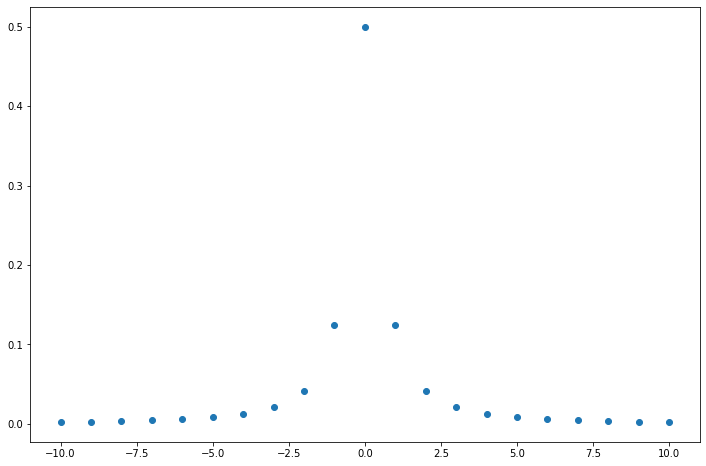

In [3]:
# Plotting the given function for integer values in [-10, 10]
def f(x):
    if x == 0:
        return 1/2
    else:
        return 1 / (4 * abs(x) * (abs(x) + 1))

l, r = -10, 10
x = range(l, r + 1)
vals = [f(i) for i in x]

plt.figure(figsize=(12, 8))
plt.scatter(x, vals)

In [18]:
# Having identity 1/[k(k+1)] = 1/k - 1/(k+1) we can easily calculate CDF and than sample using quantile function.
def sample_vec(N):
    # With equal probability we choose sign.
    sign = np.random.choice((-1, 1), N)
    uniform = np.random.rand(N)
    
    # We need to find the lowest nonegative integer k: (1-1/(2(k+1)) >= x).
    quantile = lambda t: math.ceil(1/(2 * (1 - t)) - 1)
    vf = np.vectorize(quantile)
    x = vf(uniform)
    
    return sign * x

N = 10000
data1 = sample_vec(N)
data2 = sample_vec(N)
data3 = sample_vec(N)

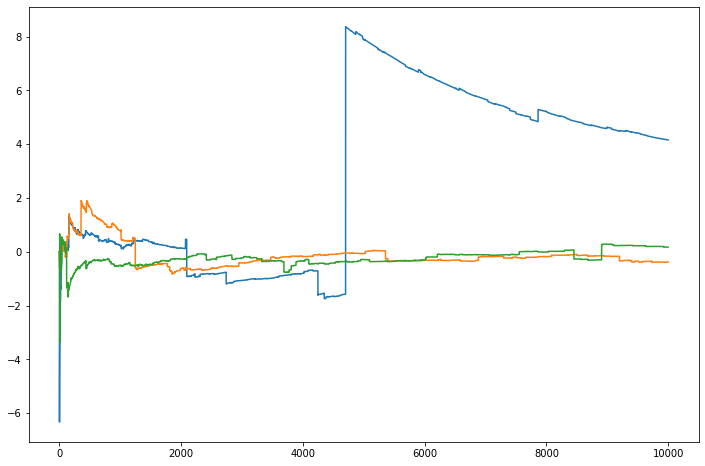

In [19]:
means1 = np.cumsum(data1) / np.arange(1, N + 1)
means2 = np.cumsum(data2) / np.arange(1, N + 1)
means3 = np.cumsum(data3) / np.arange(1, N + 1)

plt.figure(figsize=(12, 8))
plt.plot(means1)
plt.plot(means2)
plt.plot(means3)

# The series does not converge.
# We can observe "jumps" that happen from time to time - situations when numbers significantly distant from 0 
# are sampled.

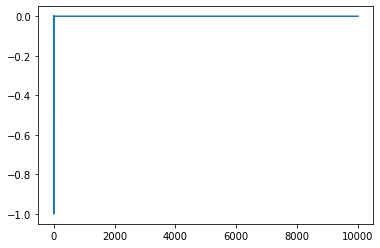

In [20]:
medians = [np.median(data1[:i+1]) for i in range(N)]

plt.plot(medians)

# In this case it looks like the series converges - almost all values are equal zero.

Answering the last point: having a distribution like X, in order to determine the center of $X + c$ for uknown $c$ I would choose the second method, since it is much more resistant for local anomaly (like sampling with low probability number that is far from potential center).


**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

In [ ]:
# 3C: 2/[k(k+1)(k+2)] = 1/[k(k+1)] - 1/[(k+1)(k+2)]

In [ ]:
# Inverse transform sampling